### Imports

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline


### Business Problem



<font color="green">XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.</font>

### Objective

<font color='green'> To generate insights to help XYZ identify the right company to make their investment.</font>

### Loading Data

In [72]:
city = pd.read_csv('City.csv')
customer_ids = pd.read_csv('Customer_ID.csv')
transaction_ids = pd.read_csv('Transaction_ID.csv.xls')
cab = pd.read_csv('Cab_Data.csv')

holidays = pd.read_csv('US Holiday Dates (2004-2021).csv')

In [73]:
holidays

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


### Cleaning the data

#### city dataset

In [74]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [75]:
# for column in city.columns:
#     if ' ' in column:
#         city = city.rename(columns={column:column.replace(' ','_')})
        
for column in ["Population","Users"] :
    
        city[column] = city[column].str.replace(',','')
       

        city[column] = city[column].astype("int")
        
city.head(10)



,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [76]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


checking for duplicates

In [77]:
city[city.duplicated()]

,City,Population,Users


there are no duplicates in this data set

checking for null values

In [78]:
city.isna().sum()

City          0
Population    0
Users         0
dtype: int64

#### customer_ids

In [79]:
customer_ids[customer_ids.duplicated()]

,Customer ID,Gender,Age,Income (USD/Month)


no duplicated data

In [80]:
customer_ids.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

no missing values

#### transaction_ids

In [81]:
transaction_ids[transaction_ids.duplicated()]

,Transaction ID,Customer ID,Payment_Mode


no duplcated data

In [82]:
transaction_ids.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

no missing values

#### cab

In [83]:
cab[cab.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


no duplicated data

converting column 'Date of travel' to datetime

In [84]:
cab['Date'] = pd.to_datetime(cab['Date of Travel'])

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: User

In [85]:
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-08-01
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-06-01
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-02-01
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-07-01
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-03-01
...,...,...,...,...,...,...,...,...
359387,10440101,08-01-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-08-01
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-04-01
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-05-01
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-05-01


#### holidays

converting column 'Date' to datetime

In [86]:
holidays['Date'] = pd.to_datetime(holidays['Date'])

In [87]:
holidays

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


### Checking for Outliers

In [25]:
def boxplot(x,fig):
    plt.subplot(3,2,fig)
    fig=data.boxplot(column=x)
    fig.set_title('')
    fig.set_ylabel('')

NameError: name 'data' is not defined

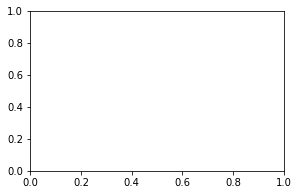

In [26]:
plt.figure(figsize=[10,10])
boxplot('KM Travelled',1)
boxplot('Users',2)
boxplot('Price Charged',3)
boxplot('Cost of Trip',4)
boxplot('Population',5)

There is an outlier in price charged but this is indeed a true outlier which can be caused by many situations one of which may be as a result of extra services provided to the users in the duration of the trip.

In [27]:
def findOutliers(x):
    IQR = data[x].quantile(0.75) - data[x].quantile(0.25)
    Lower_fence = data[x].quantile(0.25) - (IQR * 3)
    Upper_fence = data[x].quantile(0.75) + (IQR * 3)
#     data[x]=max_value(data,x,Upper_fence)
  
 
    print(x,'outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

In [60]:
findOutliers('Population')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [88]:
## population of none users of both companies


##none users of the pinkca comnpany

none_users_pinkcab= city_count_pinkcab['Population'] - city_count_pinkcab['Users_pink']

none_users_pinkcab=pd.DataFrame(none_users_pinkcab, columns=['none_users_pinkcab'])

## none users of the yellow cab company

none_users_yellowcab= city_count_yellowcab['Population'] - city_count_yellowcab['Users_yellow']

none_users_yellowcab=pd.DataFrame(none_users_yellowcab, columns=['none_users_yellowcab'])

merge_3 = pd.concat([none_users_pinkcab,none_users_yellowcab],axis=1)


### Merging the datasets

- we found that transaction_ids and cab datasets have a common primary key transaction id and so we can merge the data there
- also we can merge with city dataset with City column
- finally we can merge holidays dataset using the Date column

In [89]:
data = cab.merge(transaction_ids, how='left', on=['Transaction ID']).merge(city, on = 'City').merge(holidays, on = 'Date')

In [90]:
data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Customer ID,Payment_Mode,Population,Users,Holiday,WeekDay,Month,Day,Year
0,10000390,05-01-2016,Yellow Cab,ATLANTA GA,36.30,1036.84,435.6000,2016-05-01,29494,Card,814885,24701,Eastern Easter,Sunday,5,1,2016
1,10000473,05-01-2016,Yellow Cab,CHICAGO IL,40.80,773.42,533.6640,2016-05-01,4118,Card,1955130,164468,Eastern Easter,Sunday,5,1,2016
2,10000505,05-01-2016,Yellow Cab,CHICAGO IL,44.46,798.44,560.1960,2016-05-01,4802,Card,1955130,164468,Eastern Easter,Sunday,5,1,2016
3,10000510,05-01-2016,Yellow Cab,CHICAGO IL,36.04,711.96,501.6768,2016-05-01,4710,Cash,1955130,164468,Eastern Easter,Sunday,5,1,2016
4,10000613,05-01-2016,Yellow Cab,CHICAGO IL,40.68,860.44,576.0288,2016-05-01,4284,Cash,1955130,164468,Eastern Easter,Sunday,5,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20252,10188491,19-06-2017,Yellow Cab,WASHINGTON DC,10.30,197.52,138.4320,2017-06-19,51709,Card,418859,127001,Juneteenth,Monday,6,19,2017
20253,10188505,19-06-2017,Yellow Cab,WASHINGTON DC,37.29,759.35,505.6524,2017-06-19,51686,Cash,418859,127001,Juneteenth,Monday,6,19,2017
20254,10188514,19-06-2017,Yellow Cab,WASHINGTON DC,31.64,688.08,455.6160,2017-06-19,52545,Card,418859,127001,Juneteenth,Monday,6,19,2017
20255,10188531,19-06-2017,Yellow Cab,WASHINGTON DC,3.33,67.15,46.3536,2017-06-19,53005,Card,418859,127001,Juneteenth,Monday,6,19,2017


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20257 entries, 0 to 20256
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  20257 non-null  int64         
 1   Date of Travel  20257 non-null  object        
 2   Company         20257 non-null  object        
 3   City            20257 non-null  object        
 4   KM Travelled    20257 non-null  float64       
 5   Price Charged   20257 non-null  float64       
 6   Cost of Trip    20257 non-null  float64       
 7   Date            20257 non-null  datetime64[ns]
 8   Customer ID     20257 non-null  int64         
 9   Payment_Mode    20257 non-null  object        
 10  Population      20257 non-null  int64         
 11  Users           20257 non-null  int64         
 12  Holiday         20257 non-null  object        
 13  WeekDay         20257 non-null  object        
 14  Month           20257 non-null  int64         
 15  Da

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20257 entries, 0 to 20256
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  20257 non-null  int64         
 1   Date of Travel  20257 non-null  object        
 2   Company         20257 non-null  object        
 3   City            20257 non-null  object        
 4   KM Travelled    20257 non-null  float64       
 5   Price Charged   20257 non-null  float64       
 6   Cost of Trip    20257 non-null  float64       
 7   Date            20257 non-null  datetime64[ns]
 8   Customer ID     20257 non-null  int64         
 9   Payment_Mode    20257 non-null  object        
 10  Population      20257 non-null  int64         
 11  Users           20257 non-null  int64         
 12  Holiday         20257 non-null  object        
 13  WeekDay         20257 non-null  object        
 14  Month           20257 non-null  int64         
 15  Da

### Exploratory Data Analysis

checking distribution of both users for both cab companies

<AxesSubplot:xlabel='Users', ylabel='Count'>

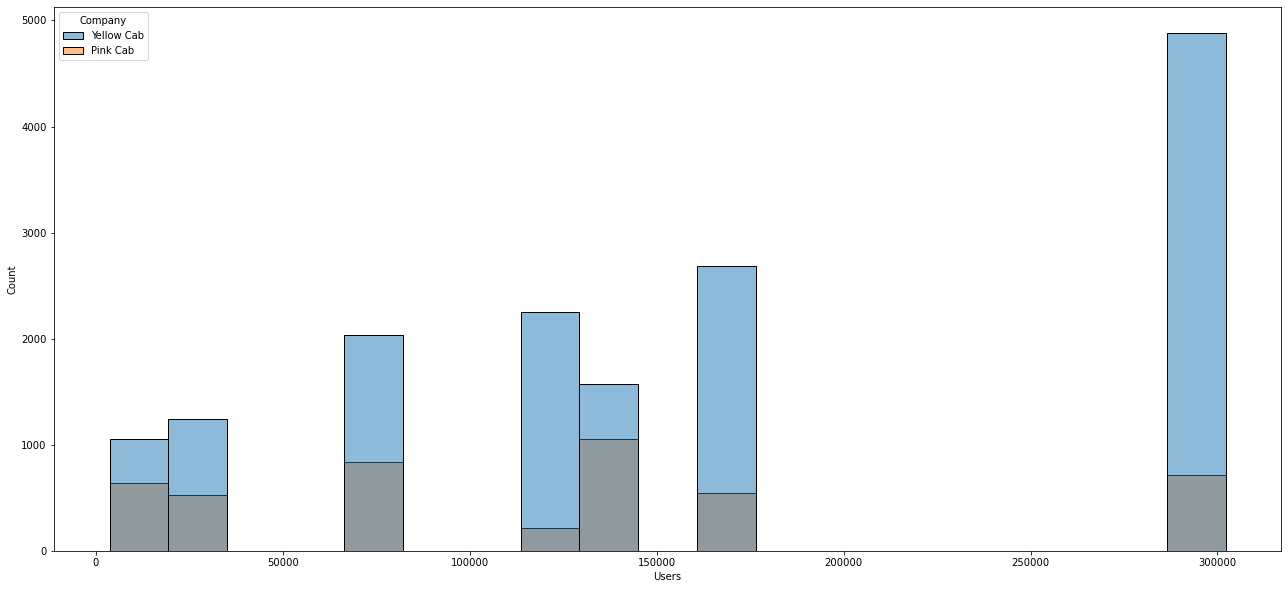

In [93]:
plt.figure(figsize=[22,10])

sns.histplot(data=data, x='Users', hue='Company')

In [94]:
## Total of the users and population avaailable to both conpanies

In [95]:
total_pop_users=data.groupby(['Company'])[['Users', 'Population']].mean(numeric_only=True)

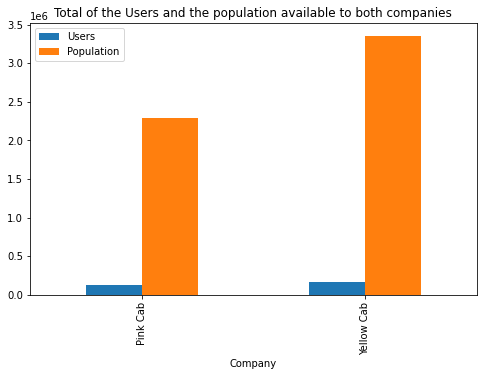

In [96]:
total_pop_users.plot(kind = 'bar', figsize=[8,5]);
plt.title('Total of the Users and the population available to both companies');

A larger population of individuals have Yellow Cab available to them than Pink Cab

In [97]:
priced_charged=data.groupby(['Company'])[['Price Charged']].mean()

Text(0.5, 1.0, 'Average price charged by both companies')

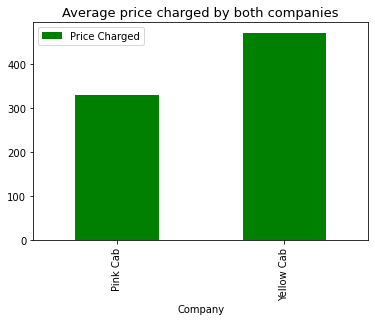

In [98]:
priced_charged.plot(kind ='bar', color='green')
plt.title('Average price charged by both companies', fontsize=13)

Yellow cab company charges slightly more on an average than the pink cab Company

In [99]:
km_travelled = data.groupby(['Company'])[['KM Travelled']].mean()

Text(0.5, 1.0, 'Average Km travelled by both companies')

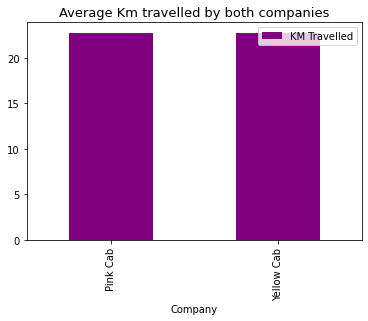

In [101]:
km_travelled.plot(kind='bar', color='purple')
plt.title('Average Km travelled by both companies', fontsize=13)

They both travel at similar average kilometers

In [102]:
## Checking distribution of users for both companies

city_count_yellowcab = data[data["Company"] == "Yellow Cab"].groupby("City").count()
city_count_pinkcab = data[data["Company"] == "Pink Cab"].groupby("City").count()
city_count_pinkcab = city_count_pinkcab.rename(columns={'Users':'Users_pink'})
city_count_yellowcab = city_count_yellowcab.rename(columns={'Users':'Users_yellow'})


merge_2 = pd.concat([city_count_pinkcab[['Users_pink']], city_count_yellowcab[['Users_yellow']]], axis=1)


Text(0.5, 1.0, 'Distribution of PinkCab and Yellow Cab Users in the 19 cities')

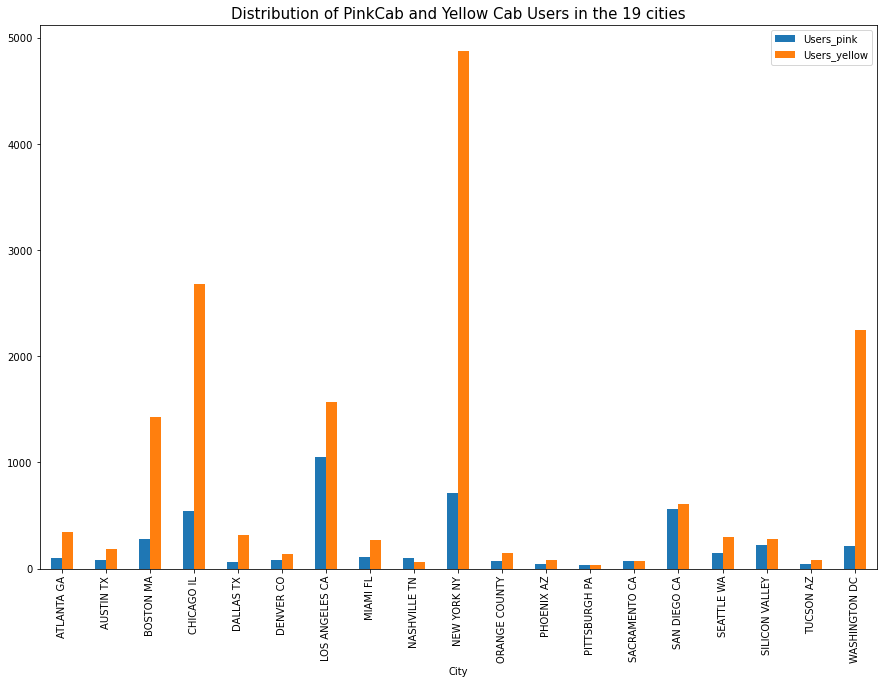

In [103]:

merge_2.plot(kind = 'bar', figsize=[15,10])
plt.title('Distribution of PinkCab and Yellow Cab Users in the 19 cities', fontsize=15)

- As we see, a large majority of Yellow cab users are found in NEW YORK NY, CHICAGO IL & WASHINTON DC with the least amount of users in PITTSBURGH CA & SACRAMENTO CA

- For Pink Cab we see that it has most of its users in LOS ANGELES CA, NEW YORK NY & SAN DIEGO CA with the least in PHOENIX AZ, PITTSBURGH CA & SACRAMENTO CA

- Overall we see that yellow cab is more patronised than pink cab in alll of the 19 cities.

    


In [104]:
## checking the profits earned by both companies from transactions

profit_yellowcab = data[data["Company"] == "Yellow Cab"].groupby("City").sum()
profit_pinkcab = data[data["Company"] == "Pink Cab"].groupby("City").sum()
profit_pinkcab = profit_pinkcab.rename(columns={'Users':'Users_pink'})
profit_yellowcab = profit_yellowcab.rename(columns={'Users':'Users_yellow'})


In [105]:


## pink can profits
profit_earned_pinkcab= profit_pinkcab['Price Charged'] - profit_pinkcab['Cost of Trip']

profit_earned_pinkcab=pd.DataFrame(profit_earned_pinkcab, columns=['Profit_earned_pinkcab'])


## yellow cab profit
profit_earned_yellowcab= profit_yellowcab['Price Charged'] - profit_yellowcab['Cost of Trip']

profit_earned_yellowcab=pd.DataFrame(profit_earned_yellowcab, columns=['Profit_earned_yellowcab'])

In [106]:
explode = np.ones(len(city_count_pinkcab.index)) * 0.1


Text(0.5, 1.0, 'Pie chart of the proportion of profits recovered by the Pink cab company from each of cities')

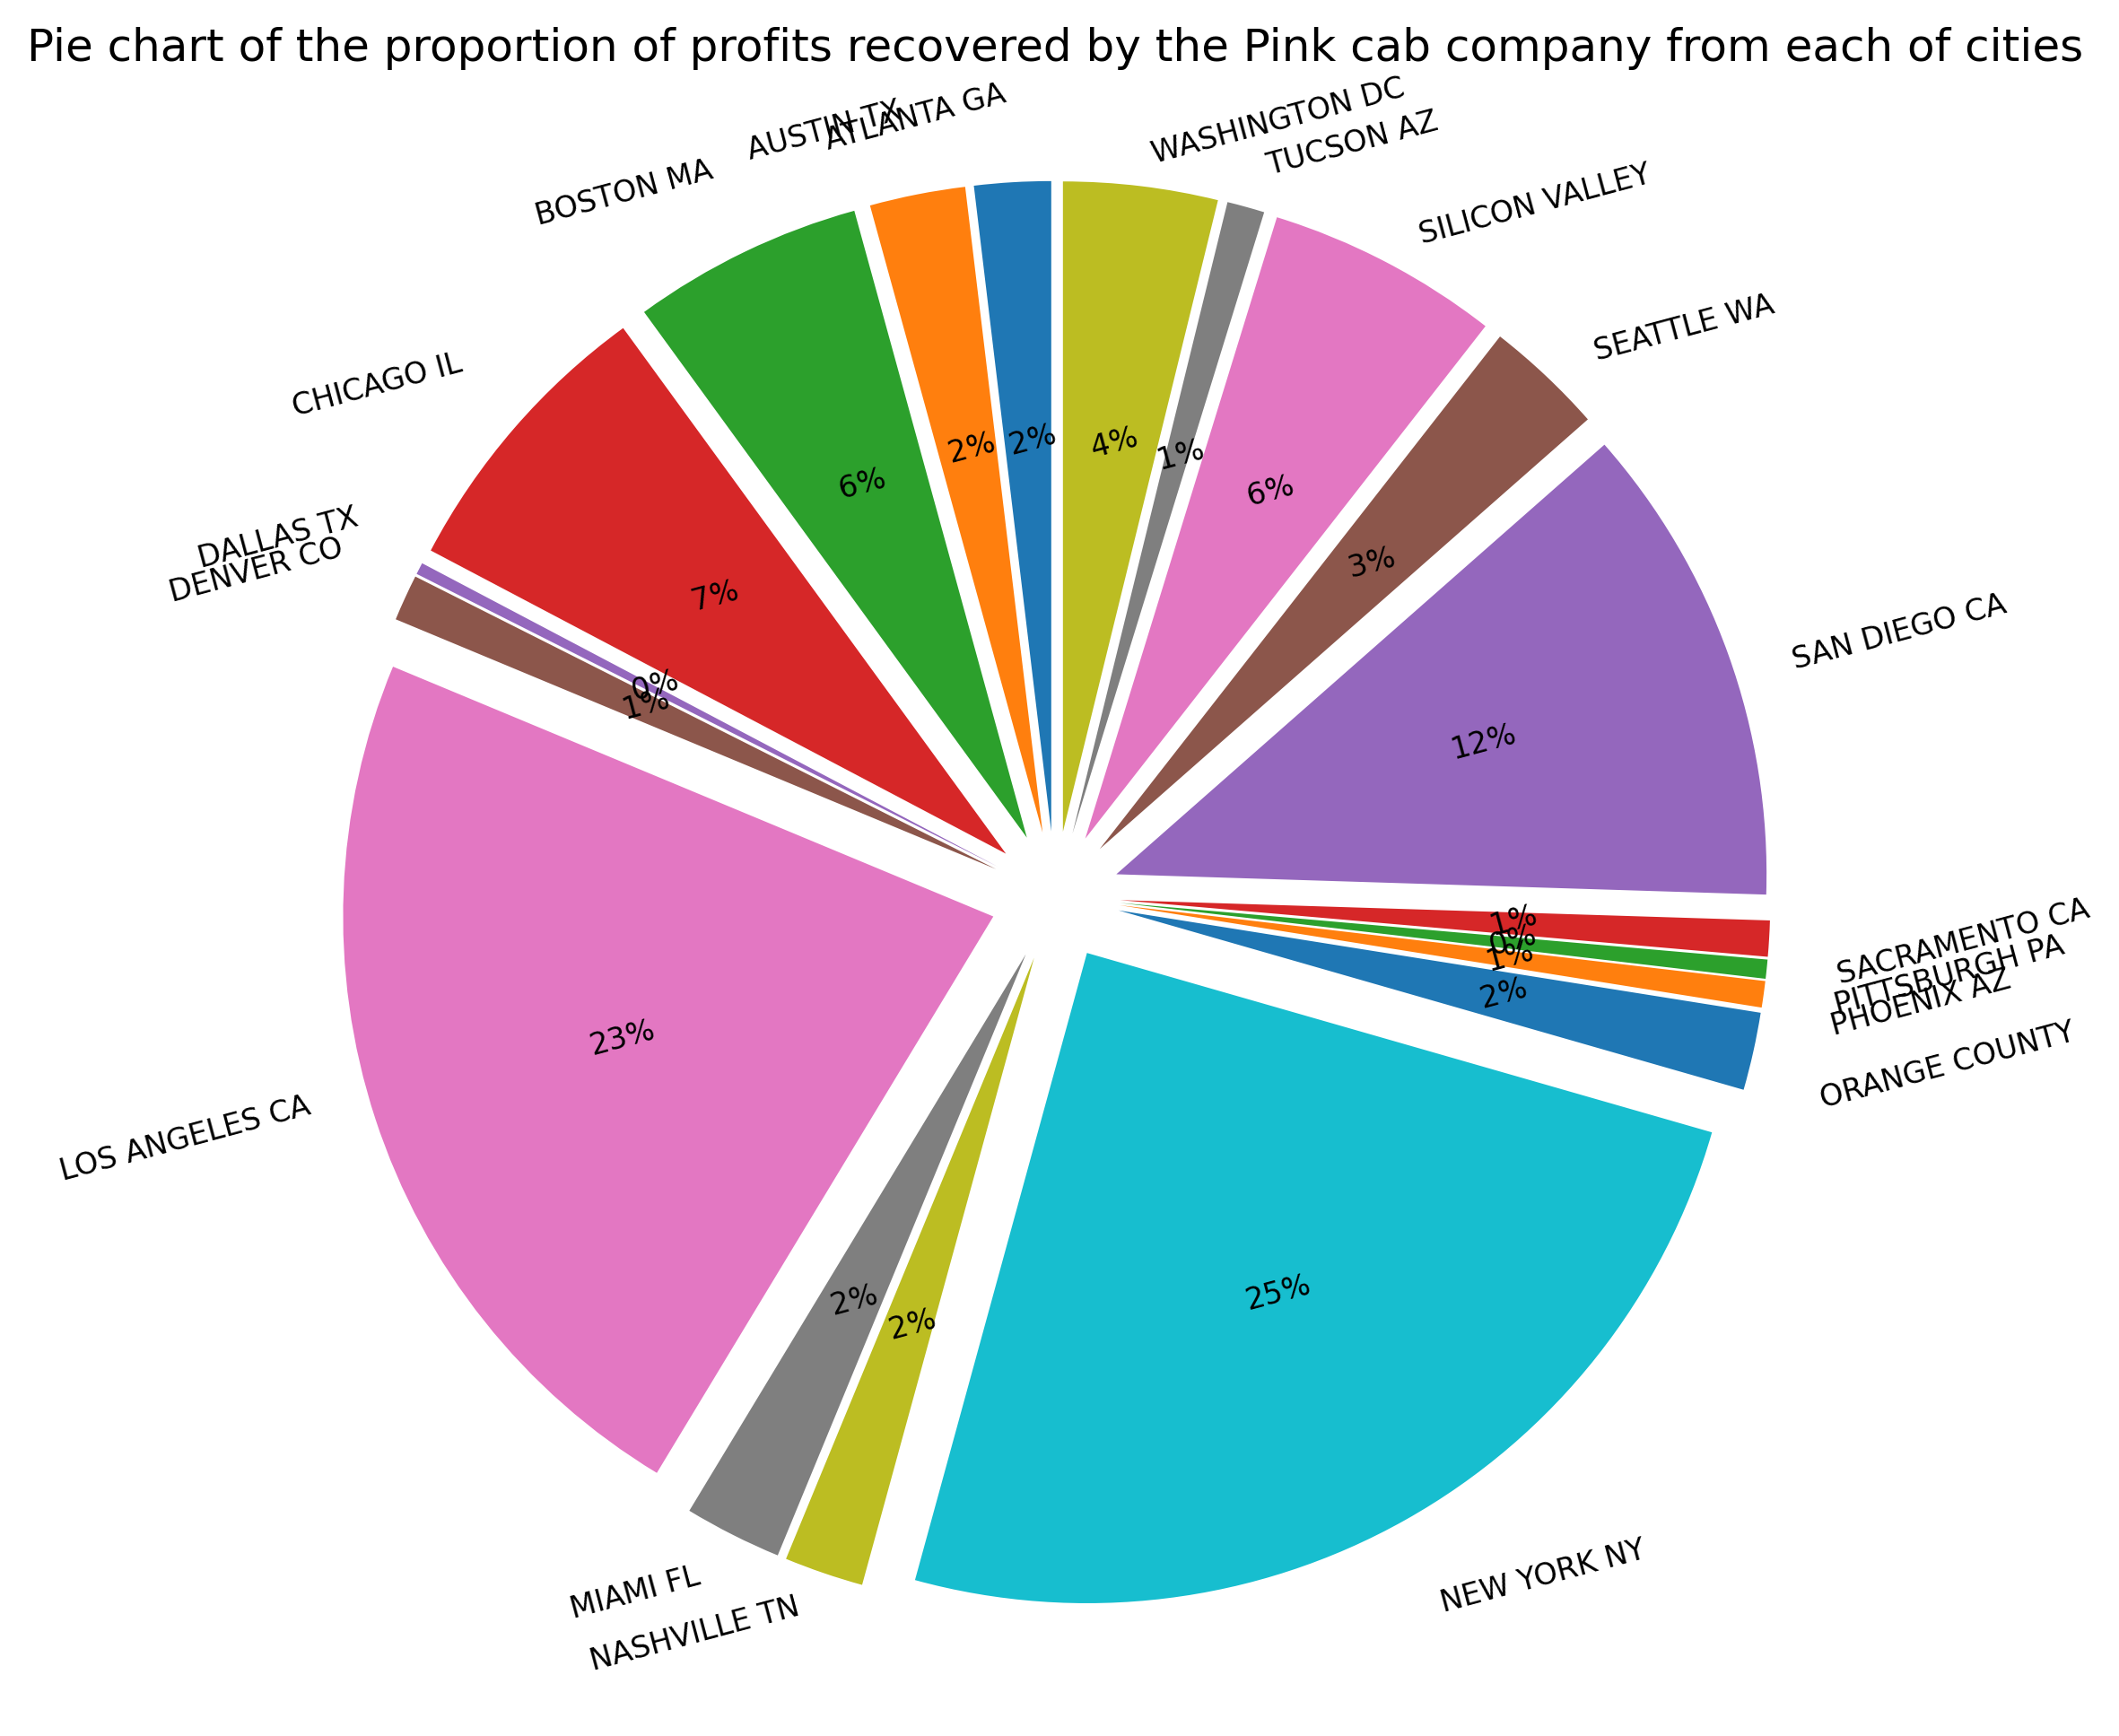

In [107]:
plt.figure(figsize=(8, 8), dpi=300)
plt.pie(profit_earned_pinkcab['Profit_earned_pinkcab'], labels=city_count_pinkcab.index,textprops={'fontsize': 8,'rotation':15}, startangle=90, 
       autopct='%2.0f%%',explode = explode, );
plt.title("Pie chart of the proportion of profits recovered by the Pink cab company from each of cities")

  - As we see the highest percentage of pink cab profits comes from NEW YORK NY, follwed by LOS ANGELES CA & SAN DIEGO
  

Text(0.5, 1.0, 'Pie chart of the proportion of profits recovered by the Yellow cab company from each of cities')

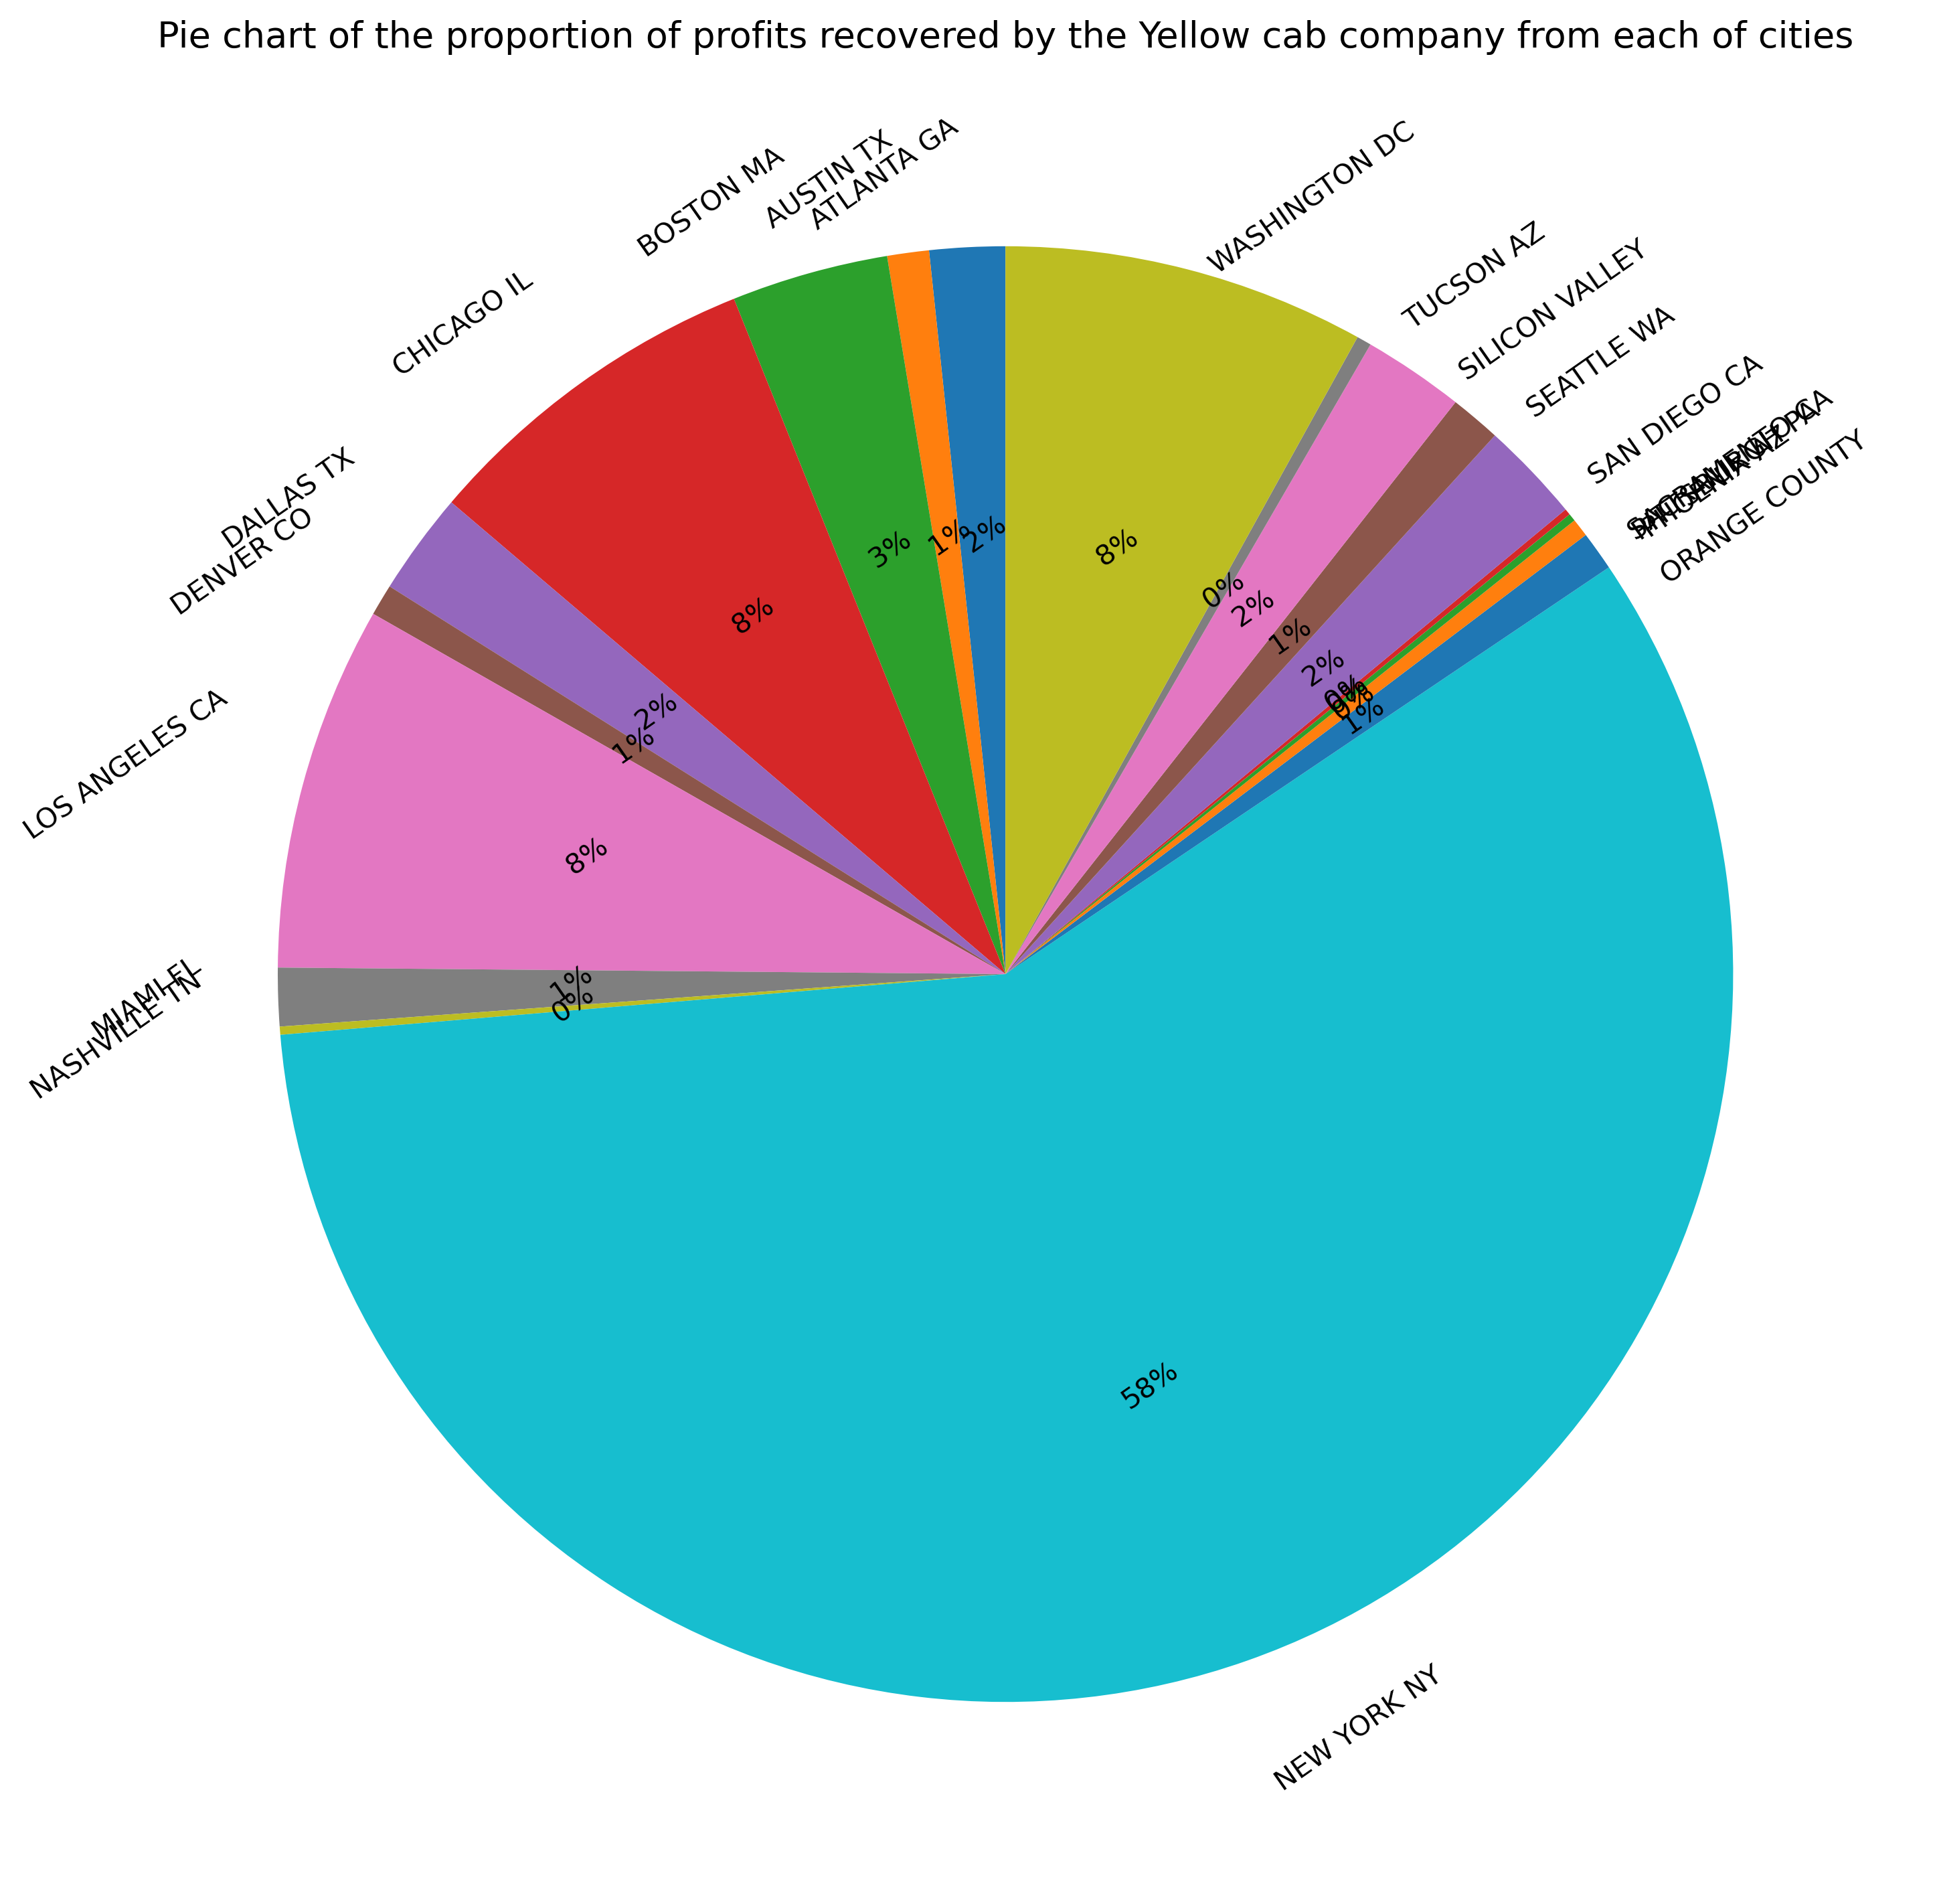

In [108]:

plt.figure(figsize=(12, 12), dpi=300)
plt.pie(profit_earned_yellowcab['Profit_earned_yellowcab'], labels=city_count_yellowcab.index,textprops={'fontsize': 10,'rotation':35}, startangle=90, 
       autopct='%2.0f%%', );
plt.title("Pie chart of the proportion of profits recovered by the Yellow cab company from each of cities", fontsize=13)


-  As we see, a large majority of Yellow cab users are found in NEW YORK NY, CHICAGO IL & WASHINTON DC with the least amount of users in PITTSBURGH CA & SACRAMENTO CA

In [109]:
## Performance of the companies during holidays


holiday_yellowcab = data[data["Company"] == "Yellow Cab"].groupby("Holiday").sum()
holiday_pinkcab = data[data["Company"] == "Pink Cab"].groupby("Holiday").sum()

In [110]:
## pink can profits
holiday_profit_pinkcab= holiday_pinkcab['Price Charged'] - holiday_pinkcab['Cost of Trip']

holiday_profit_pinkcab=pd.DataFrame(holiday_profit_pinkcab, columns=['Holiday_profit_pinkcab'])
holiday_profit_pinkcab

## yellow cab profit
holiday_profit_yellowcab= holiday_yellowcab['Price Charged'] - holiday_yellowcab['Cost of Trip']

holiday_profit_yellowcab=pd.DataFrame(holiday_profit_yellowcab, columns=['Holiday_profit_yellowcab'])


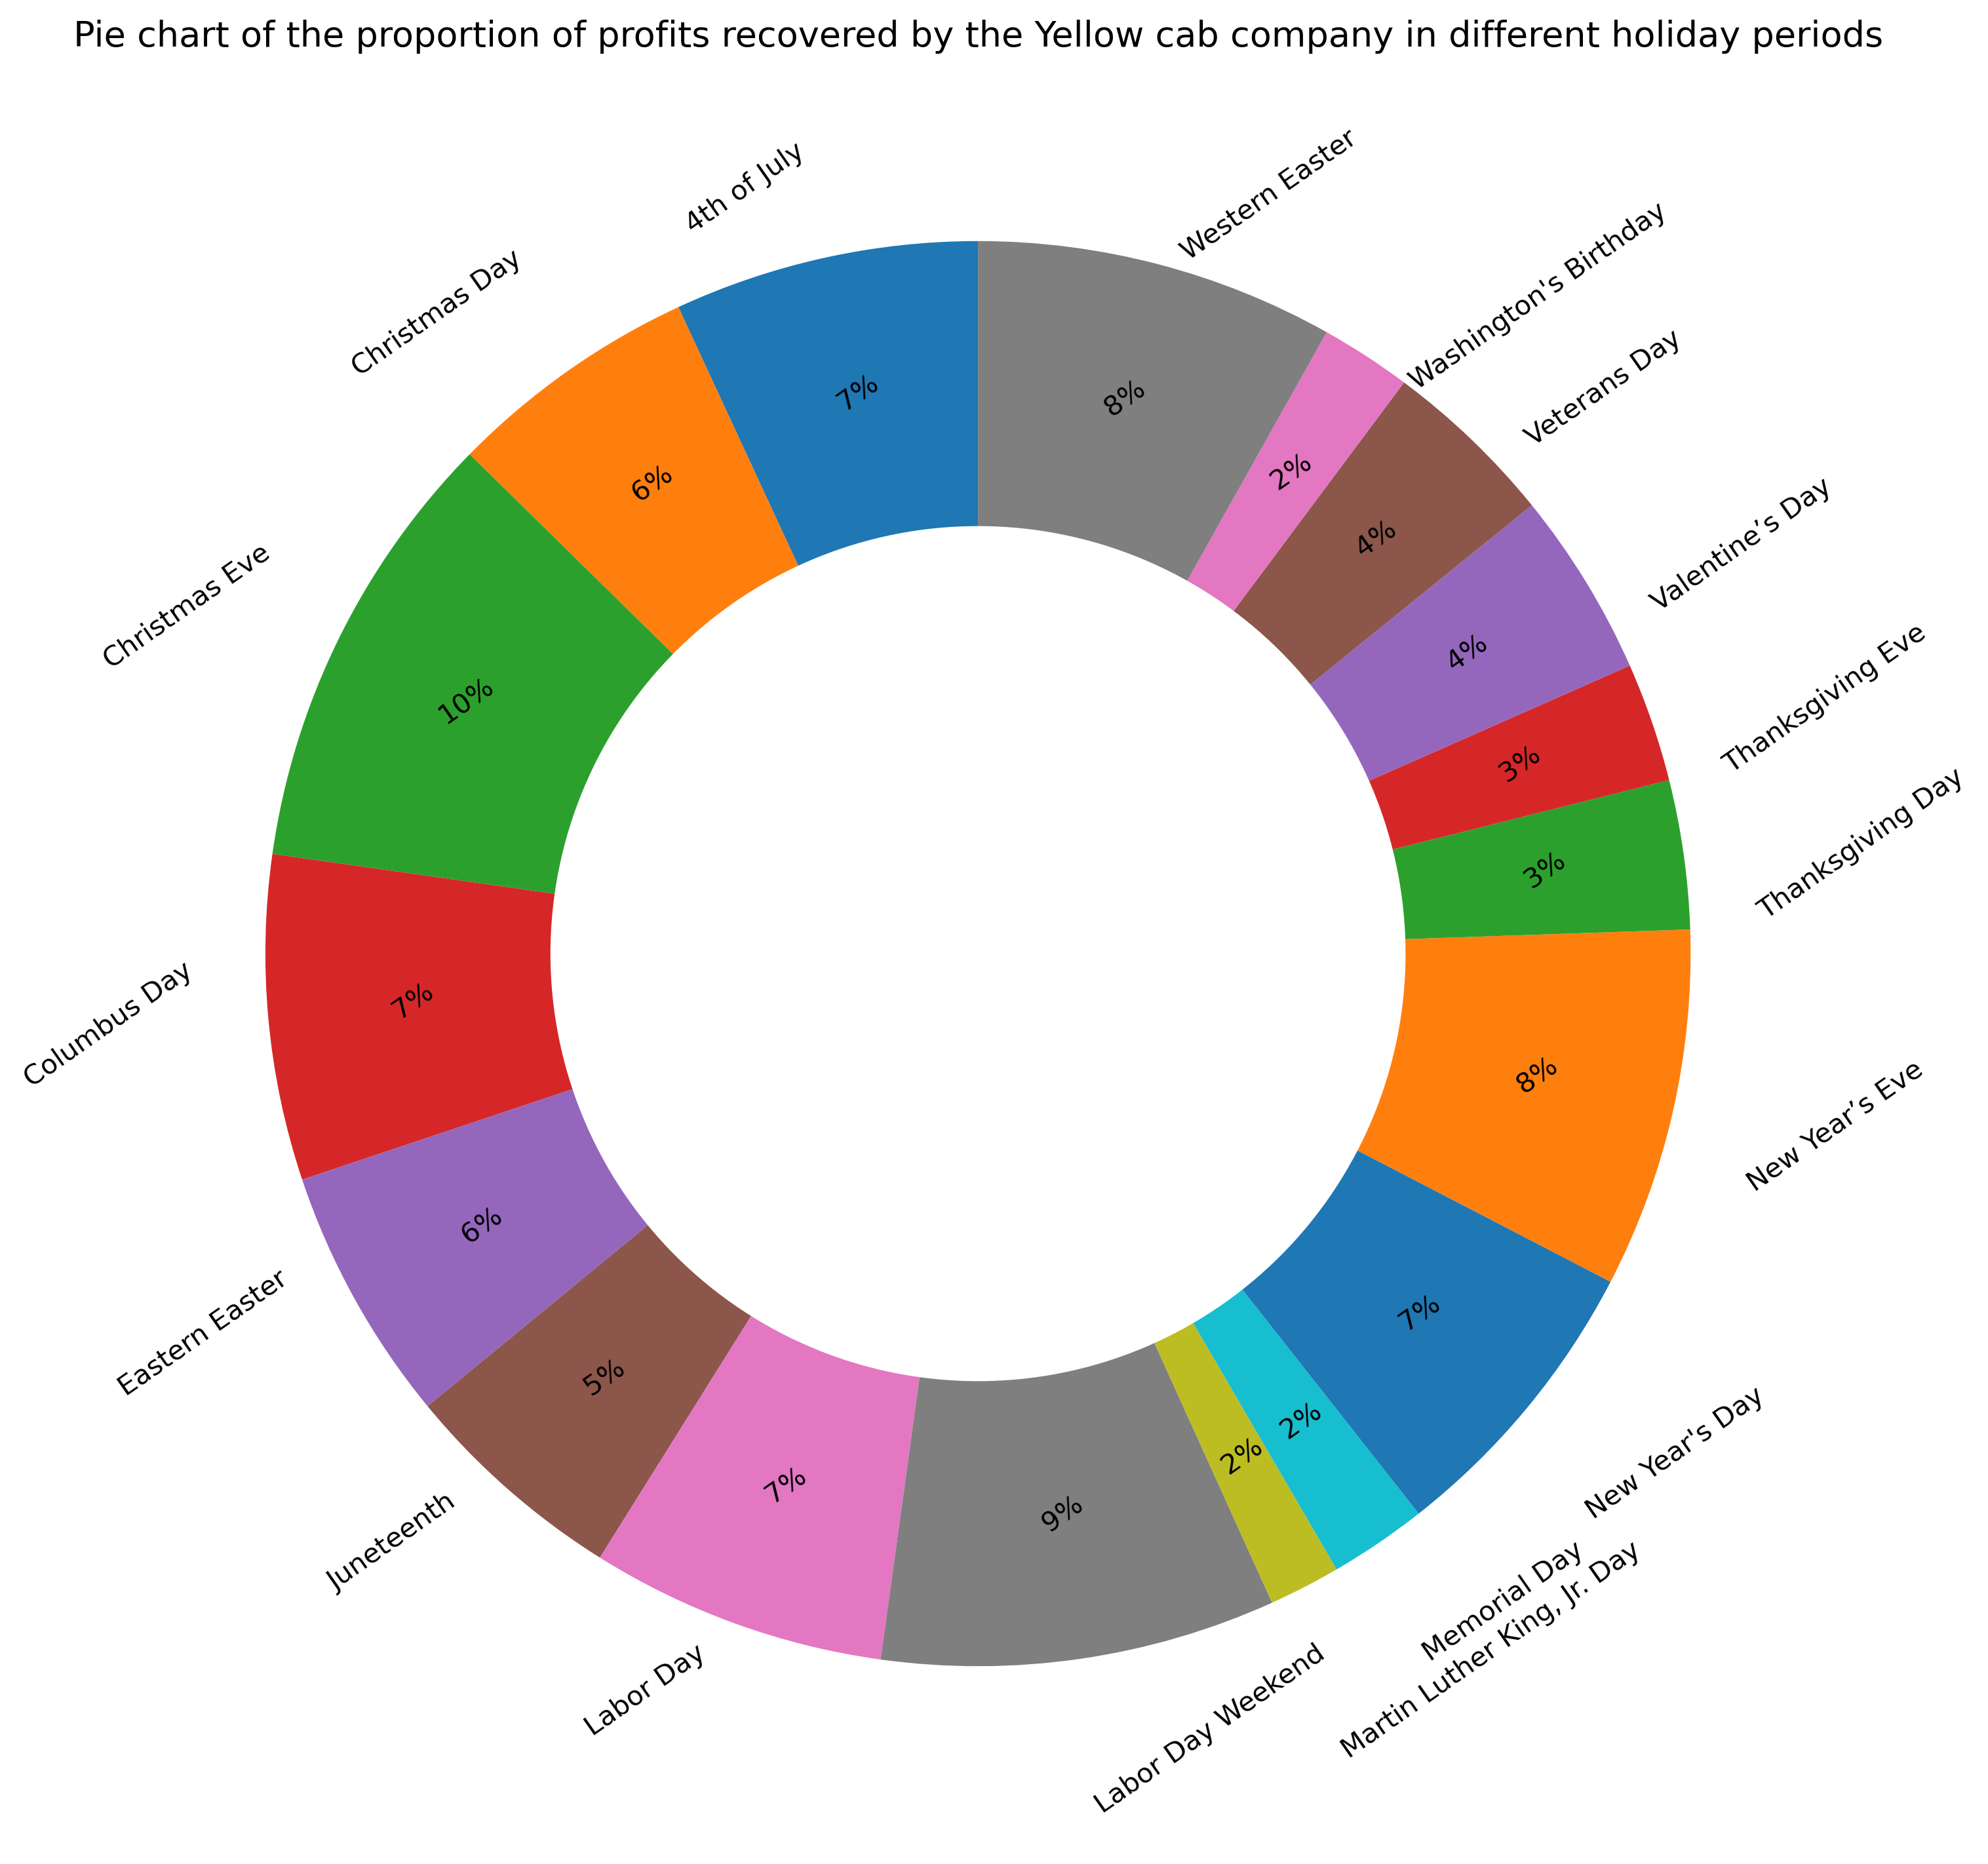

In [111]:
plt.figure(figsize=(12, 12), dpi=300)
plt.pie(holiday_profit_yellowcab['Holiday_profit_yellowcab'], labels=holiday_profit_yellowcab.index,textprops={'fontsize': 10,'rotation':35}, startangle=90, 
       autopct='%2.0f%%',pctdistance=0.8 );
plt.title("Pie chart of the proportion of profits recovered by the Yellow cab company in different holiday periods", fontsize=13)

centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)


- Highest profits earn by the yellow cab company is on Chrismas Eve, New Years's Eve and Labor Day Weekend

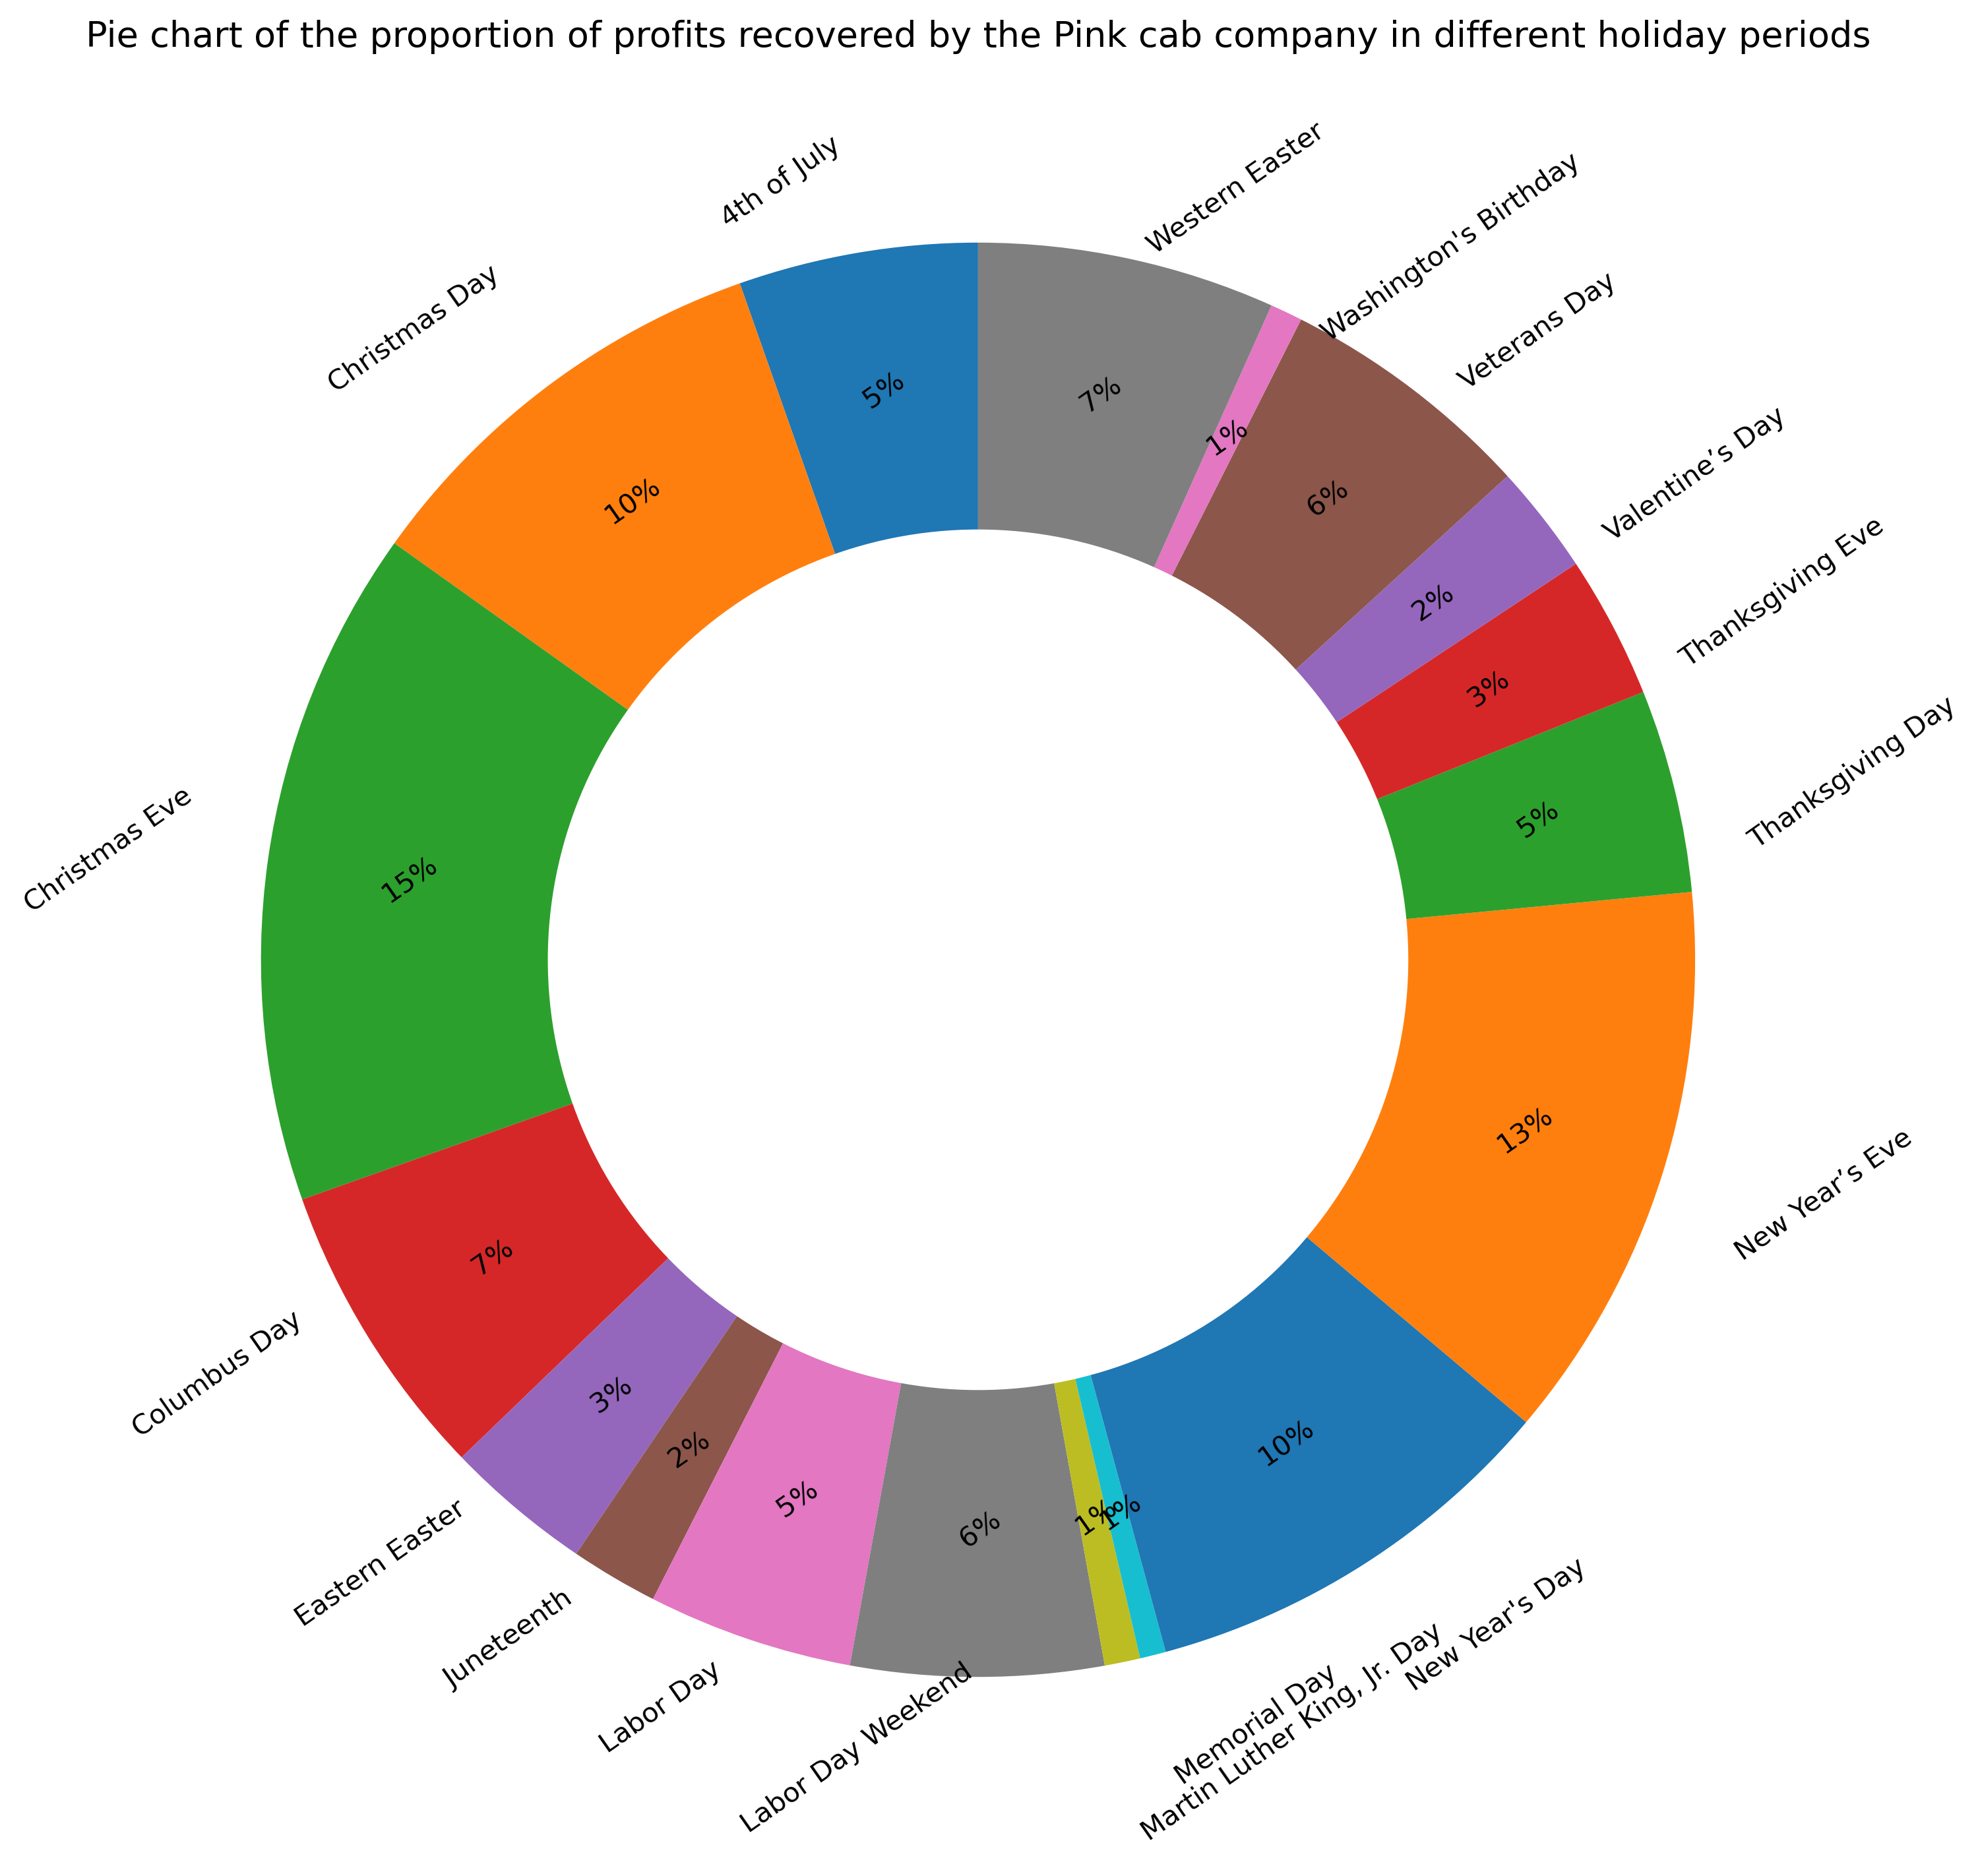

In [112]:
plt.figure(figsize=(12, 12), dpi=300)
plt.pie(holiday_profit_pinkcab['Holiday_profit_pinkcab'], labels=holiday_profit_pinkcab.index,textprops={'fontsize': 10,'rotation':35}, startangle=90, 
       autopct='%2.0f%%',pctdistance=0.8 );
plt.title("Pie chart of the proportion of profits recovered by the Pink cab company in different holiday periods", fontsize=13)

centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)


- For the pink cab company, profits are mostly made on chrismas eve, new year's day, chrismas day  & new year's eve. However they make more overall on holidays than the yellow cab company

In [113]:
pinkcab_sum_profit=holiday_profit_pinkcab['Holiday_profit_pinkcab'].sum()
yellowcab_sum_profit = holiday_profit_yellowcab['Holiday_profit_yellowcab'].sum()
print(f'Pink Cab holiday profits sum = {pinkcab_sum_profit}\t|Yellow Cab holiday profits sum = {yellowcab_sum_profit}\t ')

Pink Cab holiday profits sum = 354899.403	|Yellow Cab holiday profits sum = 2687943.1608	 


In [114]:
## check if there was a decline over the years in usage of cab companies
## Performance of the companies over the years in terms of users

year_yellowcab = data[data["Company"] == "Yellow Cab"].groupby("Year").sum()
year_pinkcab = data[data["Company"] == "Pink Cab"].groupby("Year").sum()


Text(0.5, 1.0, 'Distribution of Yellow Cab users over the years')

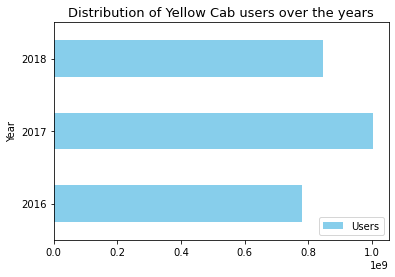

In [115]:
year_yellowcab[['Users']].plot(kind='barh', color='skyblue')
plt.title('Distribution of Yellow Cab users over the years', fontsize=13)

Text(0.5, 1.0, 'Distribution of Pink Cab users over the years')

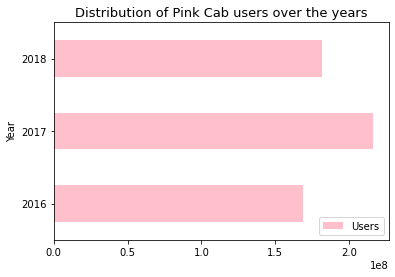

In [116]:
year_pinkcab[['Users']].plot(kind='barh', color='pink')
plt.title('Distribution of Pink Cab users over the years', fontsize=13)

They both recorded the highest number of users in 2017 although the yellow cab company recorded more users in all the years than the pink cab company(three times as much)

In [121]:
yearly_profits_pinkcab = (year_pinkcab['Price Charged'] - year_pinkcab['Cost of Trip'])
yearly_profits_yellowcab = (year_yellowcab['Price Charged'] - year_yellowcab['Cost of Trip'])

In [ ]:
y

Text(0.5, 1.0, 'Distribution of Pink Cab profits over the years')

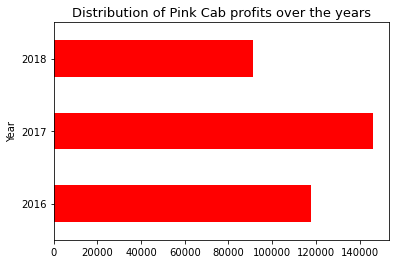

In [131]:
yearly_profits_pinkcab.plot(kind='barh', color='red')
plt.title('Distribution of Pink Cab profits over the years', fontsize=13)

Text(0.5, 1.0, 'Distribution of Yellow Cab profits over the years')

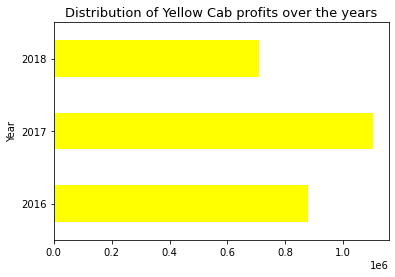

In [130]:
yearly_profits_yellowcab.plot(kind='barh', color='yellow')
plt.title('Distribution of Yellow Cab profits over the years', fontsize=13)

While Both companies made their highest of profits in 2017, we see that yellow cab made about 3 times the amount of profits made by Pink Cab firm in each of the years. In addition to that, we see that Yellow Cab firm made 7.57 times the total profit made by Pink Cab firm in all the years.

In [728]:
print(f'Yearly profit Pink Cab:{round(yearly_profits_pinkcab,1)}\t| Yearly profits Yellow Cab:{round(yearly_profits_yellowcab,1)}')

Yearly profit Pink Cab:354899.4	| Yearly profits Yellow Cab:2687943.2


In [729]:
yearly_profits_yellowcab/yearly_profits_pinkcab

7.573817081907012

The following was deducted from the analysis:
- A larger population of individuals have Yellow Cab available to them than Pink Cab
- Yellow cab company charges slightly more on an average than the pink cab Company
- They both travel at similar average kilometers
- - As we see, a large majority of Yellow cab users are found in NEW YORK NY, CHICAGO IL & WASHINTON DC with the least amount of users in PITTSBURGH CA & SACRAMENTO CA

- For Pink Cab we see that it has most of its users in LOS ANGELES CA, NEW YORK NY & SAN DIEGO CA with the least in PHOENIX AZ, PITTSBURGH CA & SACRAMENTO CA

- Overall we see that yellow cab is more patronised than pink cab in all of the 19 cities.
 - As we see the highest percentage of pink cab profits comes from NEW YORK NY, follwed by LOS ANGELES CA & SAN DIEGO
- Highest profits earn by the yellow cab company is on Chrismas Eve, New Years's Eve and Labor Day Weekend
- They both recorded the highest number of users in 2017 although the yellow cab company recorded more users in all the years than the pink cab company
- For the pink cab company, profits are mostly made on chrismas eve, new year's day, chrismas day  & new year's eve. However they make more overall on holidays than the yellow cab company
- They both recorded the highest number of users in 2017 although the yellow cab company recorded more users in all the years than the pink cab company(three times as much)


### Conclusion


<font color='green' size=3> We see that the Yellow cab firm is the more popular cab firm as it is not only available to a larger population of individuals in America(especially in cities with the largest population), but also has a larger number of users than the Pink cab firm. This is the case regardless of the fact that they charge more on an average than their counterpart firm and travel same KM on an average. We still see that yellow cab makes 7.6 times the profit that Pink Cab makes in a year regardless of the fact that Pink cab makes more on holidays. We will recommend Yellow Cab Firm for investment.  </font>